# **Lecture5 homework: wind turbulence statistics**

Name: San Zhang

Stuent ID: 24SXXXXXX

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [7]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

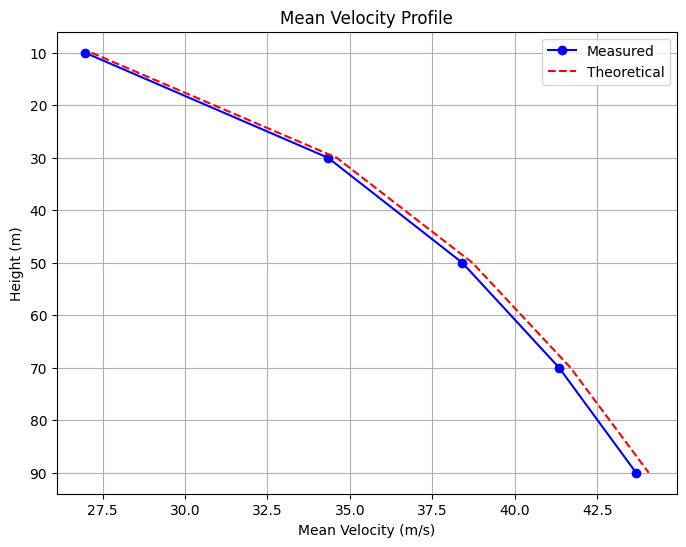

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import norm

# 计算平均风速剖面
U_avg_measured = np.mean(U, axis=1)  # 对时间方向取平均值

# 计算理论平均风速剖面
def theoretical_velocity_profile(heights, Ur=50, zr=160, alpha=0.22):
    return Ur * (np.array(heights) / zr) ** alpha

U_avg_theory = theoretical_velocity_profile(Z)

# 绘制平均风速剖面
def plot_mean_velocity(U_measured, heights, U_theory):
    plt.figure(figsize=(8, 6))
    plt.plot(U_measured, heights, 'bo-', label='Measured')  # 实测风速剖面
    plt.plot(U_theory, heights, 'r--', label='Theoretical')  # 理论风速剖面
    plt.xlabel('Mean Velocity (m/s)')
    plt.ylabel('Height (m)')
    plt.title('Mean Velocity Profile')
    plt.legend()
    plt.grid()
    plt.gca().invert_yaxis()  # 反转 Y 轴，使高度从下到上增加
    plt.show()

# 调用绘图函数
plot_mean_velocity(U_avg_measured, Z, U_avg_theory)

#### 1.2 Turbulence intensity profile

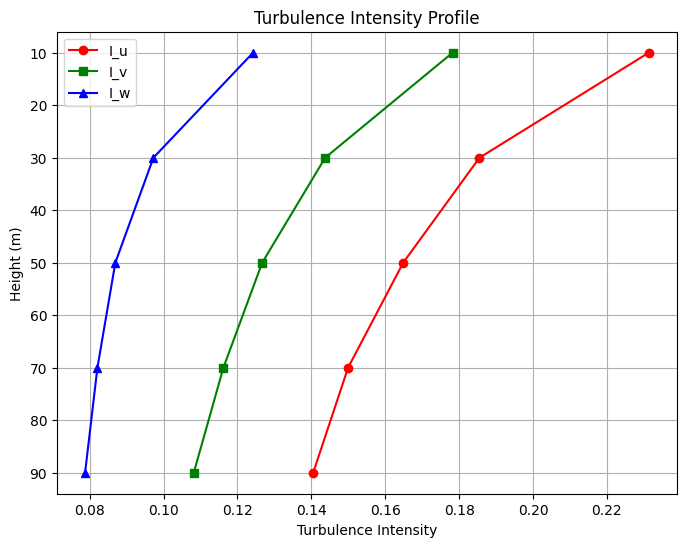

In [9]:
# 计算湍流强度
def compute_turbulence_intensity(U, V, W):
    U_avg = np.mean(U, axis=1)  # 计算 U 分量的平均风速
    sigma_u = np.std(U, axis=1)  # 计算 U 分量的标准差
    sigma_v = np.std(V, axis=1)  # 计算 V 分量的标准差
    sigma_w = np.std(W, axis=1)  # 计算 W 分量的标准差
    
    I_u = sigma_u / U_avg  # U 分量的湍流强度
    I_v = sigma_v / U_avg  # V 分量的湍流强度
    I_w = sigma_w / U_avg  # W 分量的湍流强度
    
    return I_u, I_v, I_w

# 调用函数计算湍流强度
I_u, I_v, I_w = compute_turbulence_intensity(U, V, W)

# 绘制湍流强度剖面
def plot_turbulence_intensity(I_u, I_v, I_w, heights):
    plt.figure(figsize=(8, 6))
    plt.plot(I_u, heights, 'r-o', label='I_u')  # 绘制 U 分量的湍流强度
    plt.plot(I_v, heights, 'g-s', label='I_v')  # 绘制 V 分量的湍流强度
    plt.plot(I_w, heights, 'b-^', label='I_w')  # 绘制 W 分量的湍流强度
    plt.xlabel('Turbulence Intensity')
    plt.ylabel('Height (m)')
    plt.title('Turbulence Intensity Profile')
    plt.legend()
    plt.grid()
    plt.gca().invert_yaxis()  # 反转 Y 轴，使高度从下到上增加
    plt.show()

# 调用绘图函数
plot_turbulence_intensity(I_u, I_v, I_w, Z)

#### 1.3 Wind power spectral density

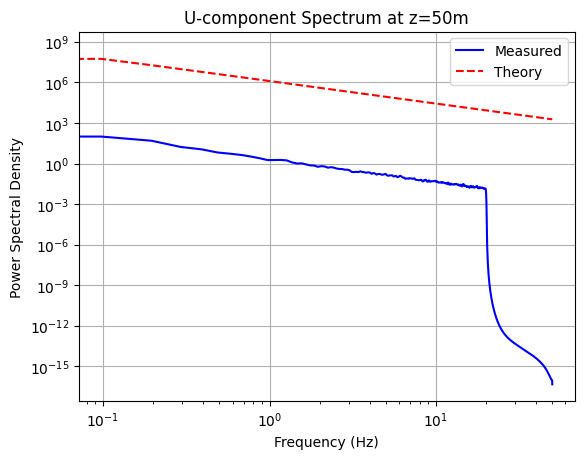

In [10]:
def wind_spectrum(u_prime, dt, L_u, U_avg, component='u'):
    """
    计算风功率谱密度
    :param u_prime: 脉动风速
    :param dt: 时间间隔
    :param L_u: 湍流积分尺度
    :param U_avg: 平均风速
    :param component: 分量 ('u', 'v', 'w')
    """
    fs = 1 / dt
    f, Su = signal.welch(u_prime, fs, nperseg=1024)
    
    # Von Karman 理论谱
    if component == 'u':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg)) / (1 + 70.8 * (L_u * f / U_avg)**2)**(5/6)
    elif component == 'v':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg) * (1 + 188.4 * (2 * L_u * f / U_avg)**2)) / (1 + 70.8 * (2 * L_u * f / U_avg)**2)**(11/6)
    elif component == 'w':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg) * (1 + 188.4 * (2 * L_u * f / U_avg)**2)) / (1 + 70.8 * (2 * L_u * f / U_avg)**2)**(11/6)
    
    # 绘图
    plt.loglog(f, Su, 'b', label='Measured')
    plt.loglog(f, Su_theory, 'r--', label='Theory')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f'{component.upper()}-component Spectrum at z=50m')
    plt.legend()
    plt.grid()
    plt.show()

idx = 2
u_prime = U[idx] - np.mean(U[idx])
L_u = 100 * (Z[idx] / 30)**0.5  
wind_spectrum(u_prime, dt=0.01, L_u=L_u, U_avg=np.mean(U[idx]), component='u')

#### 1.4 Probability density curve

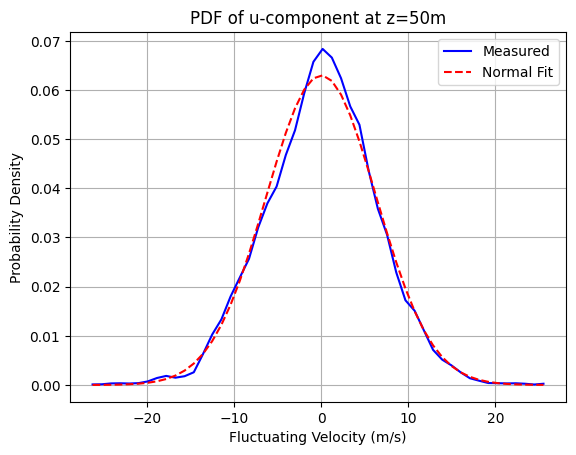

In [11]:
def plot_pdf(u_prime):
    # 计算直方图
    hist, bins = np.histogram(u_prime, bins=50, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # 拟合正态分布
    mu, std = norm.fit(u_prime)
    pdf_theory = norm.pdf(bin_centers, mu, std)
    
    # 绘图
    plt.plot(bin_centers, hist, 'b-', label='Measured')
    plt.plot(bin_centers, pdf_theory, 'r--', label='Normal Fit')
    plt.xlabel('Fluctuating Velocity (m/s)')
    plt.ylabel('Probability Density')
    plt.title('PDF of u-component at z=50m')
    plt.legend()
    plt.grid()
    plt.show()

plot_pdf(u_prime)

### 2 Statistical results of the y-direction wind velocity time history

In [12]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

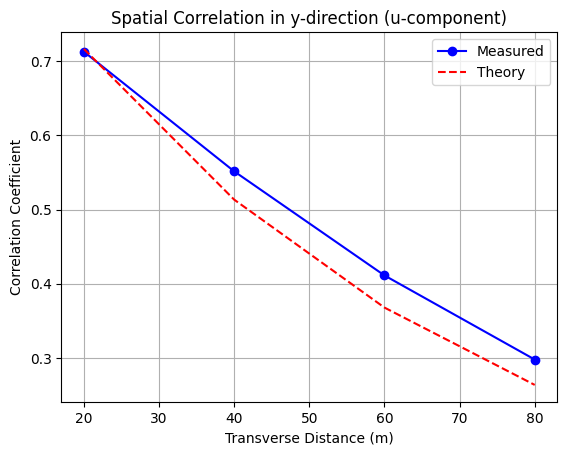

In [14]:
def spatial_correlation(U, Y_positions, L_prime=60):
    # 以第一个测点（y=0）为参考
    ref_u = U[0]
    correlations = []
    distances = []
    
    for i in range(1, 5):
        target_u = U[i]
        corr = np.corrcoef(ref_u, target_u)[0, 1]
        correlations.append(corr)
        distances.append(Y_positions[i] - Y_positions[0])
    
    # 理论模型
    r = np.array(distances)
    rho_theory = np.exp(-r / L_prime)
    
    # 绘图
    plt.plot(distances, correlations, 'bo-', label='Measured')
    plt.plot(distances, rho_theory, 'r--', label='Theory')
    plt.xlabel('Transverse Distance (m)')
    plt.ylabel('Correlation Coefficient')
    plt.title('Spatial Correlation in y-direction (u-component)')
    plt.legend()
    plt.grid()
    plt.show()

spatial_correlation(U, Y, L_prime=60)